# Part 1 - Find a topic & a dataset

## Gathering the Data

Aquire data from [List of Railway Stations in Denmark Wiki](https://en.wikipedia.org/wiki/List_of_railway_stations_in_Denmark)

Copied the Wikipedia table element and converted it into a CSV and excel file.

Then I needed to get the google reviews, and location, so I scraped google using the csv as my list. Used selinium to scrape, got help from LLM because Google doesn't allow scraping and I needed to slow down the process.

In [ ]:
# pip install selenium

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.options import Options
import time

### Web Scraping Code

In [ ]:
#------------------------
# WEB SCRAPING
#------------------------

# station_names = railway_data['station'].tolist()
# def init_browser():
#     chrome_options = Options()
#     chrome_options.add_argument("--headless")
#     chrome_options.add_argument("--no-sandbox")
#     chrome_options.add_argument("--disable-dev-shm-usage")
#     chrome_options.add_argument("--lang=en-US")
#     return webdriver.Chrome(options=chrome_options)

# def scrape_station_info(station_name):
#     driver = init_browser()
#     try:
#         search_url = f"https://www.google.com/maps/search/{station_name}+station+Denmark"
#         driver.get(search_url)
#         time.sleep(3)
#         try:
#             first_result = driver.find_element(By.CSS_SELECTOR, 'a.hfpxzc')
#             first_result.click()
#             time.sleep(3)
#         except Exception:
#             pass
#         # try:
#         #     name = driver.find_element(By.CSS_SELECTOR, 'h1.DUwDvf').text
#         # except:
#         #     name = None

#         # try:
#         #     address = driver.find_element(By.CSS_SELECTOR, '[data-item-id="address"]').text
#         # except:
#         #     address = None

#         # try:
#         #     rating = driver.find_element(By.CSS_SELECTOR, 'span.MW4etd').text
#         # except:
#         #     rating = None
#         try:
#             driver.find_element(By.CSS_SELECTOR, 'div.Gpq6kf.NlVald').click()

#             find_top = driver.find_element(By.XPATH, '//*[@id="action-menu"]/div/div[3]')
#             find_top.click()
#             top_review = driver.find_element(By.CSS_SELECTOR, 'div.MyEned').text
#             time.sleep(3)
#             find_bottom = driver.find_element(By.XPATH, '//*[@id="action-menu"]/div/div[4]')
#             find_bottom.click()
#             bottom_review = driver.find_element(By.CSS_SELECTOR, 'div.MyEned').text
#         except:
#             top_review = bottom_review = None

#         return {
#             # "Station Name": name,
#             # "Address": address,
#             # "Rating": rating,
#             "top_review": top_review,
#             "bottom_review": bottom_review
#         }
#     finally:
#         driver.quit()

# # addresses = []
# # ratings = []
# top_reviews = []
# bottom_reviews = []

# for station in station_names:
#     print(f"Scraping {station}...")
#     try:
#         data = scrape_station_info(station)
#         # addresses.append(data['Address'])
#         # ratings.append(data['Rating'])
#         top_reviews.append(data['top_review'])
#         bottom_reviews.append(data['bottom_review'])
#     except Exception as e:
#         print(f"Failed to scrape {station}: {e}")
#         # addresses.append(None)
#         # ratings.append(None)
#         top_reviews.append(None)
#         bottom_reviews.append(None)

# # railway_data['address'] = addresses
# # railway_data['review_rating'] = ratings
# railway_data['top_review'] = top_reviews
# railway_data['bottom_review'] = bottom_reviews


## Data Explained

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathered from Wiki table
**[station]**
- station name
- str

**[station_code]**
- station abbreviation code
- str

**[year_opened]**
- year the station opended
- num

**[serves]**
- area that the station serves
- str

**[railway_line]**
- line that the station is on
- str

**[passengers]**
- number of passengers (was not able to determine if this is monthly or yearly, confusing source)
- num

**[remarks]**
- notes about the station
- str

### Web scraped from Google Search
**[address]**
- location
- str

**[review_rating]**
- google review (num of stars)
- float

**[top_review]**
- top google and assuming railway user rating
- str

**[bottom_review]**
- bottom google and assuming railway user rating
- str

## Topic Explained

Denmark's railway stations have incredible history, looking at some of the years when the stations were opened blew my mind. Contrasting some of the newer stations and systems like the light rails in copenhagen could be an interesting avenue to explore. Passenger numbers compared to location and proximity to larger cities –– indicating where more people work and where people live. Sentiment analysis based on user reviews.

# Part 2 - Clean, Organize & Explore

In [ ]:
railway_data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/enriched_rail_transport_dk.csv')
railway_data.head()

,station,station_code,year_opened,serves,railway_line,passengers,remarks,Address,lat,lon,Review Rating,Top Review,Bottom Review
0,Albertslund,Alb,1931,Albertslund,Høje Taastrup Line,NaN,Named Vridsløselille until 1963,"\nHedemarksvej 1, 2620 Albertslund, Denmark",55.656626,12.338486,3.5,Station is near to the centrum and also studen...,"Clean and tidy, little 7/11. Easy to use tick..."
1,Alken,Ak,1871,Alken,Skanderborg–Skjern,150.0,NaN,"\n8660 Skanderborg, Denmark",56.039604,9.927942,3.8,NaN,NaN
2,Allerød,Li,1864,Lillerød,North Line,7900.0,Named Lillerød until 1952,"\n4A, 3450 Lillerød, Denmark",55.875130,12.302978,5.0,One of the better working train stations in th...,"I,m professional barber working in soo many co..."
3,Amstrup,Amt,1903,NaN,Lemvig Line,NaN,NaN,"\n7660 Bækmarksbro, Denmark",56.416474,8.308421,4.0,NaN,NaN
4,Arden,Ad,1869,Arden,Randers–Aalborg,450.0,Previously named Store-Arden,"\nJernbanegade 6, 9510 Arden, Denmark",56.769758,9.859978,4.5,You can get on and off the train. There is a t...,Nice place


## Problem 2.1
Clean and organize the data to do the following:
- Remove unnecessary / extraneous columns
- Rename columns appropriately
- Manage omissions, NA’s, and data types in columns (e.g., removing ‘$’s’ and NaN)


In [ ]:
# -------------
# 2.1 - Cleaning Data
# -------------

# Convert Scraping column names to underscores
railway_data = railway_data.rename(columns={
    'Address': 'address',
    'Review Rating': 'review_rating',
    'Top Review': 'top_review',
    'Bottom Review': 'bottom_review'
})

# Remove strange characters in the address column
railway_data['address'] = railway_data['address'].str.replace('\n', '', regex=False)

# Insert 0 for all stations without passengers and convert to int (not float)
railway_data['passengers'] = railway_data['passengers'].fillna(0).astype(int)
# print(railway_data['passengers'].dtype)
# print(railway_data['passengers'].head())

# Check for any other omissions and remove (help from LLM)
# For all object (string) columns, replace NaN with "Unknown"
railway_data.loc[:, railway_data.select_dtypes(include='object').columns] = \
  railway_data.select_dtypes(include='object').fillna('Unknown')

# Convert year_opened to datetime (format YYYY)
railway_data['year_opened'] = pd.to_datetime(railway_data['year_opened'], format='%Y', errors='coerce')


#verification
print(railway_data.select_dtypes(include='object').isna().sum())

station          0
station_code     0
serves           0
railway_line     0
remarks          0
address          0
top_review       0
bottom_review    0
dtype: int64


In [ ]:
railway_data.head()

,station,station_code,year_opened,serves,railway_line,passengers,remarks,address,lat,lon,review_rating,top_review,bottom_review
0,Albertslund,Alb,1931-01-01,Albertslund,Høje Taastrup Line,0,Named Vridsløselille until 1963,"Hedemarksvej 1, 2620 Albertslund, Denmark",55.656626,12.338486,3.5,Station is near to the centrum and also studen...,"Clean and tidy, little 7/11. Easy to use tick..."
1,Alken,Ak,1871-01-01,Alken,Skanderborg–Skjern,150,Unknown,"8660 Skanderborg, Denmark",56.039604,9.927942,3.8,Unknown,Unknown
2,Allerød,Li,1864-01-01,Lillerød,North Line,7900,Named Lillerød until 1952,"4A, 3450 Lillerød, Denmark",55.875130,12.302978,5.0,One of the better working train stations in th...,"I,m professional barber working in soo many co..."
3,Amstrup,Amt,1903-01-01,Unknown,Lemvig Line,0,Unknown,"7660 Bækmarksbro, Denmark",56.416474,8.308421,4.0,Unknown,Unknown
4,Arden,Ad,1869-01-01,Arden,Randers–Aalborg,450,Previously named Store-Arden,"Jernbanegade 6, 9510 Arden, Denmark",56.769758,9.859978,4.5,You can get on and off the train. There is a t...,Nice place


## Problem 2.2
Explore the data by doing the following:

Apply descriptive statistics to the data, reporting:
- Mean, median, mode and standard deviation for quantitative continuous data in the dataset;
- Tables to report prevalence / frequency counts for quantitative discrete and qualitative data in the dataset;


In [ ]:
# -------------
# 2.2 - Exploring Data
# -------------

# Calc stats
continuous_cols = railway_data.select_dtypes(include=['float64', 'int64']).columns
print("# columns:", list(continuous_cols))

stats_summary = pd.DataFrame(index=continuous_cols)
stats_summary['mean'] = railway_data[continuous_cols].mean()
stats_summary['median'] = railway_data[continuous_cols].median()
stats_summary['std_dev'] = railway_data[continuous_cols].std()
stats_summary['mode'] = railway_data[continuous_cols].mode().iloc[0]
print(stats_summary)

# columns: ['passengers', 'lat', 'lon', 'review_rating']
                      mean     median      std_dev       mode
passengers     2225.617284  85.000000  7832.168844   0.000000
lat              55.911414  55.771865     0.585628  56.548697
lon              10.800961  11.149352     1.532622   8.304646
review_rating     3.864240   3.900000     0.688459   4.000000


In [ ]:
# frequency
discrete_cols = [col for col in continuous_cols if railway_data[col].nunique()]
qualitative_cols = railway_data.select_dtypes(include='object').columns

print("Discrete columns:", discrete_cols)
print("Qualitative columns:", list(qualitative_cols))

for col in discrete_cols:
  print(f"\nFrequency table for {col}:")
  print(railway_data[col].value_counts().sort_index())

for col in qualitative_cols:
  print(f"\nFrequency table for {col}:")
  print(railway_data[col].value_counts().head(5)) # top 5

Discrete columns: ['passengers', 'lat', 'lon', 'review_rating']
Qualitative columns: ['station', 'station_code', 'serves', 'railway_line', 'remarks', 'address', 'top_review', 'bottom_review']

Frequency table for passengers:
passengers
0         219
10          1
30          3
40          2
50          6
         ... 
26000       1
28600       1
28800       1
103600      1
107800      1
Name: count, Length: 143, dtype: int64

Frequency table for lat:
lat
54.773896    1
54.775802    1
54.783010    2
54.798788    1
54.812409    2
            ..
57.500640    1
57.533332    3
57.590803    5
57.592542    2
57.725970    3
Name: count, Length: 373, dtype: int64

Frequency table for lon:
lon
8.180695     3
8.202963     1
8.211798     3
8.242325     2
8.254064     2
            ..
12.602001    1
12.608054    1
12.613007    3
12.614533    1
12.637996    1
Name: count, Length: 373, dtype: int64

Frequency table for review_rating:
review_rating
1.0     4
2.0     8
2.2     1
2.3     2
2.4     3
2.5

## Problem 2.3
Explore the data visually by doing the following:

- Develop at least three quantitative visualizations to describe the data in ways that are important to the objectives outlined in Problem 1.1.
- Ensure these visualizations are legible, have appropriate axes title and scales, and include appropriate interpretation (legend and/or caption).
- Conduct an exploratory qualitative analysis using one or more of the following methods:
  - Word frequency and co-occurrence analysis using Python’s Counter or similar tools.
  - Keyword-in-context (KWIC) searches using NLTK’s Concordance.
  - You’re welcome to ‘stretch’ to another qualitative data analysis approach, e.g. Topic Modeling, to assist with this.

- Present your results visually (e.g., bar charts or word clouds) and interpret what the recurring words, phrases, or relationships suggest about the dataset’s narrative themes.


In [ ]:
# setup
railway_data['station_age'] = pd.Timestamp.now().year - railway_data['year_opened'].dt.year

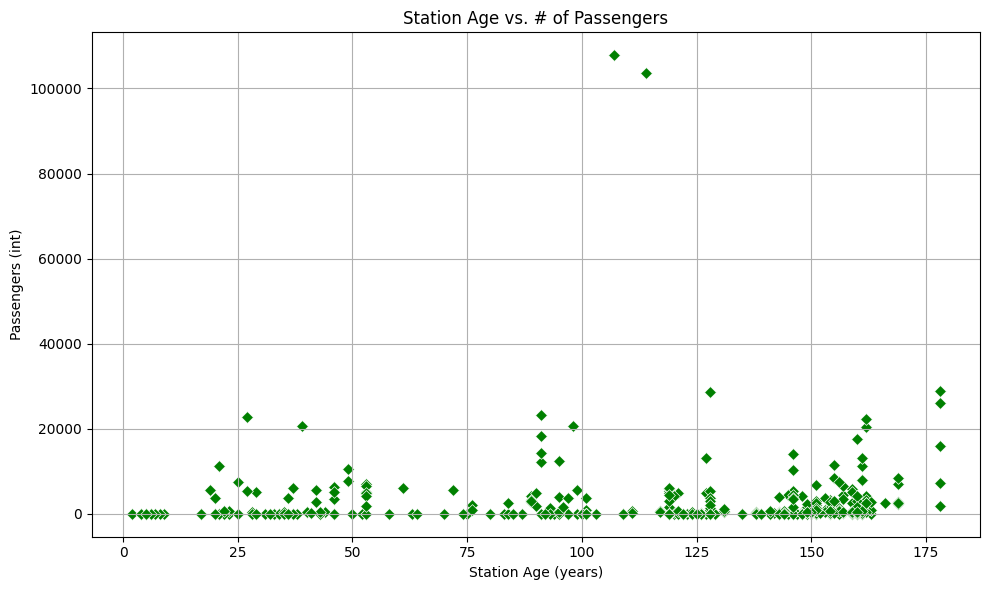

In [ ]:
# ----------------
# Age Vs. Usage
# ----------------

plt.figure(figsize=(10,6))
sns.scatterplot(data=railway_data, x='station_age', y='passengers', marker='D', color='green')
#sns.regplot(data=railway_data, x='station_age', y='passengers', scatter=False, color='orange')
plt.title("Station Age vs. # of Passengers")
plt.xlabel("Station Age (years)")
plt.ylabel("Passengers (int)")
plt.grid(True)
plt.tight_layout()
plt.show()

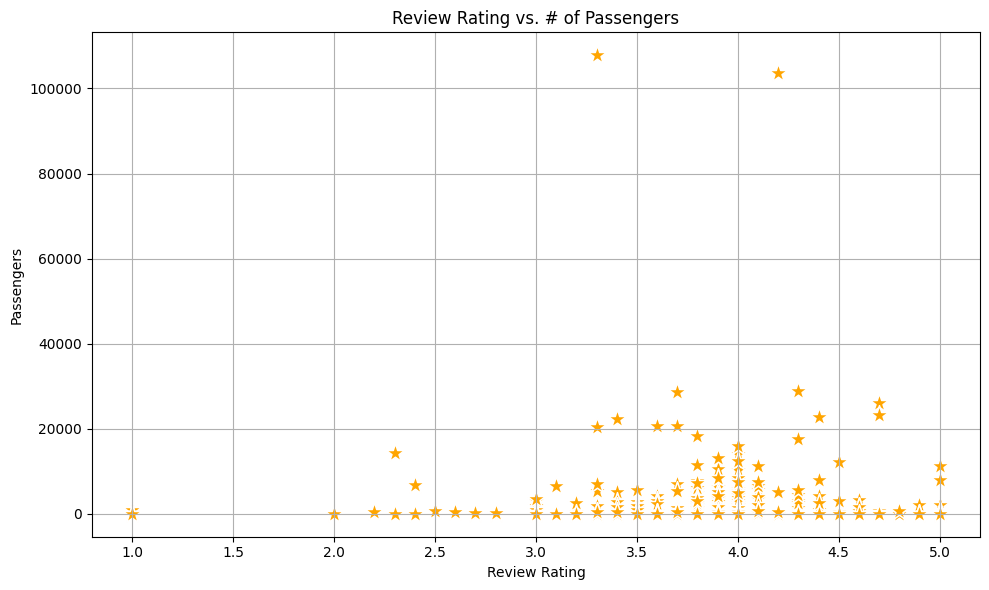

In [ ]:
# ---------------
# Ratings vs num passengers
# ---------------

plt.figure(figsize=(10,6))
sns.scatterplot(data=railway_data, x='review_rating', y='passengers', marker='*', color='orange', s=200)
#sns.regplot(data=railway_data, x='review_rating', y='passengers', scatter=False, color='orange')
plt.title("Review Rating vs. # of Passengers")
plt.xlabel("Review Rating")
plt.ylabel("Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-53936396.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_passengers.values, y=city_passengers.index, palette='viridis')


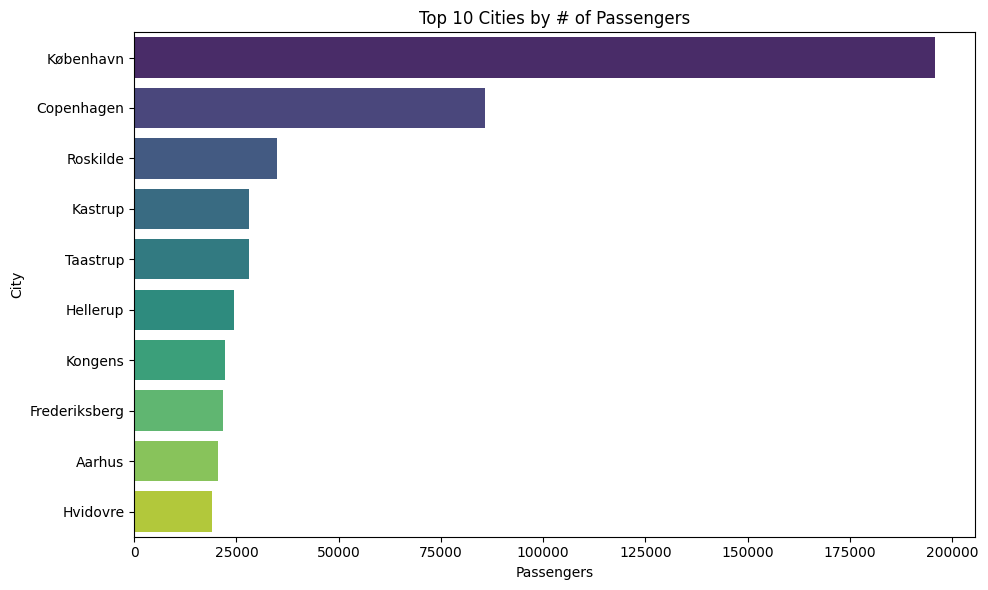

In [ ]:
# --------------
# Geographic distro
# --------------

#got help from LLM with special characters issue
railway_data['postal_city'] = railway_data['address'].str.extract(r'(\d{4,5}\s[\wÆØÅæøå\-]+)', expand=False)
railway_data['city'] = railway_data['postal_city'].str.extract(r'\d{4,5}\s([\wÆØÅæøå\-]+)', expand=False)

#print(railway_data['city'].head(20))
city_passengers = railway_data.groupby('city')['passengers'].sum().sort_values(ascending=False).head(10)
#print(city_passengers)

plt.figure(figsize=(10,6))
sns.barplot(x=city_passengers.values, y=city_passengers.index, palette='viridis')
plt.title("Top 10 Cities by # of Passengers")
plt.xlabel("Passengers")
plt.ylabel("City")
plt.tight_layout()
plt.show()

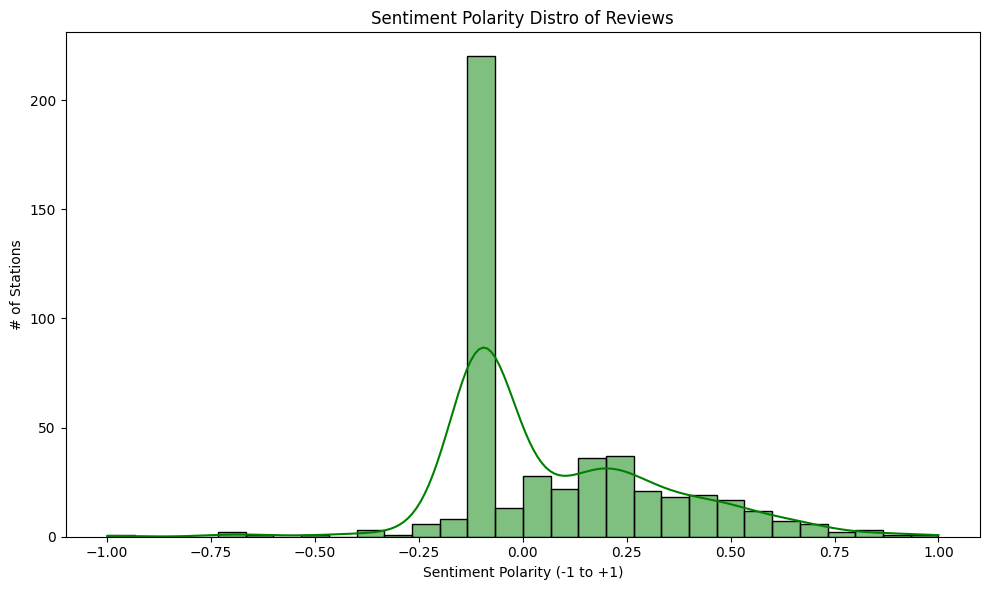

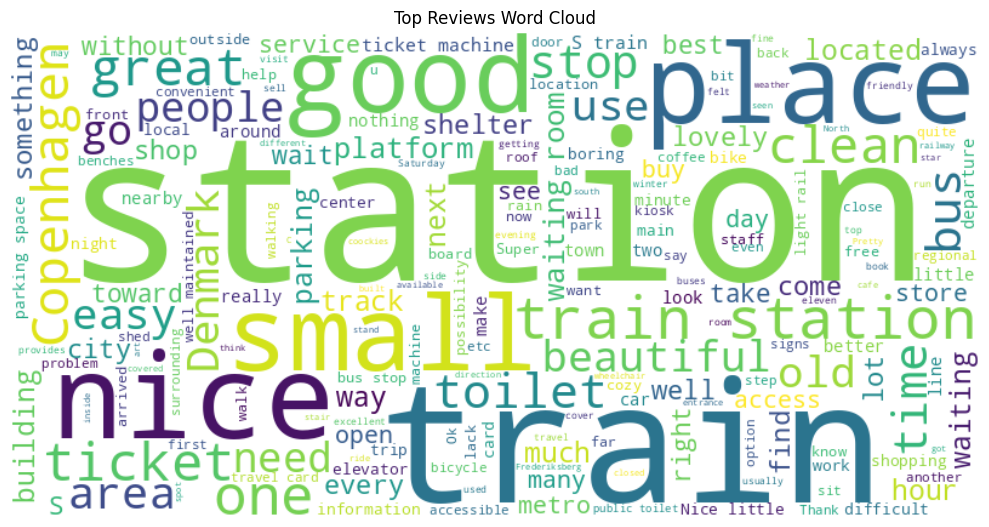

In [ ]:
# ---------------
# Language analysis
# ---------------

# sentiment
all_reviews = railway_data['top_review'] + ' ' + railway_data['bottom_review']
railway_data['review_sentiment'] = all_reviews.apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10,6))
sns.histplot(railway_data['review_sentiment'], bins=30, kde=True, color='green')
plt.title("Sentiment Polarity Distro of Reviews")
plt.xlabel("Sentiment Polarity (-1 to +1)")
plt.ylabel("# of Stations")
plt.tight_layout()
plt.show()

#word cloud top reviews
top_text = ' '.join(railway_data.loc[railway_data['top_review'] != 'Unknown', 'top_review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Reviews Word Cloud")
plt.tight_layout()
plt.show()

## Problem 2.4
Describe the distribution of the data.
- What can you conclude / observe about this data based on descriptive sentences? Write 5+ sentences describing the distribution of the data, and what it signifies about the data source and what the data implies.

```
# columns: ['passengers', 'review_rating']
                      mean  median      std_dev  mode
passengers     2225.617284    85.0  7832.168844   0.0
review_rating     3.864240     3.9     0.688459   4.0
```

> Starting with the statistical analysis, most of of the stations are fairly highly rated at an average of 3.86. Although, there is not any data for where these ratings come from (international vs domestic users) the train stations seem to impress their audience non-the-less. However, it would be interesting to see the difference between Danish rider sentiments and International rider sentiments.

> When it comes to station usage, the data isn't overly skewed, many of the stations that are older, still have extremely high ridership (according to Wiki data). One of the highest ridden stations is over 100 years old –– one can assume that because of its high traffic, it is maintained incredibly well.

> Unsurprisingly Copenhagen/Kobenhavn have the most ridership, as it is the most populated city and has its own transit system (Metro) that is incredibly well maintained and autonomous.


# Part 3 - Inferences

## Problem 3.1
[Text Block] Design at least two different inference tests to draw conclusions from the data.
- Develop objectives for your tests and translate them into Null Hypotheses (two separate tests). Label these H01 and H02.
- For each test, describe what “Type I” and “Type II” errors would mean.
- Given the nature of the data, indicate what type of test would be useful: (i.e., proportion test of two groups; means test of two groups; means test of multiple groups)
- Select a study power and statistical significance level.
- As the dataset is already confirmed in terms of number of samples, determine what the minimum detectable effect (MDE) will be for each test.


---


### Test 1 - Do stations on different lines have different avg passenger counts?

**Null Hypothesis [H01]:**
- *The mean of passerngers is the same across all lines.*

**Type of Test:**
- Anova
- ```passengers```
- ```railway_line```

**Type 1 Error:**
- Reject H01, railway lines doesn't affect the number of passengers

**Type 2 Error:**
- Fail to reject H01, railway lines do have different passengers numbers

[Power]: sada
[Significance]: sdadsa
---


### Test 2 - Are highly rated stations used more than lower rated ones?
**Null Hypothesis [H02]:**
- *The average number of passengers is equal for high rated and low rated stations*

**Type of Test:**
- T-Test
- ```passengers```
- ```stations```
- ```rating```

**Type 1 Error:**
- Conclude that ratings affect passenger numbers when it doesn't

**Type 2 Error:**
- Fail to recognize the effect that high-rated stations have more passengers

[Power]: sada
[Significance]: sdadsa

### Test 3 - Is the number of "Unknown" reviews lower for stations with more passengers?

**Null Hypothesis [H03]:**
- *The number of "Unknown" reviews is the same for low-traffic and high traffic stations.*

**Type of Test:**
- Proportion
- ```"unknown"```
- ```top_review``` & ```bottom_review```

**Type 1 Error:**
- Conclude that busier stations have fewer "Unknown" reviews when they don't

**Type 2 Error:**
- Fail to find that completed reviews are correlated to usage

[Power]: sada
[Significance]: sdadsa

## Problem 3.2
Prepare for tests.
- While we will perform tests assuming normality given the central limit theorem, apply the Shapiro-Wilk test to determine the normality of the data you’re examining.


In [ ]:
# passenger normality
shapiro_all = stats.shapiro(railway_data['passengers'])
# high rated normality
shapiro_high = stats.shapiro(railway_data[railway_data['review_rating'] >= 4.0]['passengers'])
# low rated normality
shapiro_low = stats.shapiro(railway_data[railway_data['review_rating'] < 4.0]['passengers'])

print("Shapiro-Wilk Test Results:")
print(f"All Stations:            W={shapiro_all.statistic:.4f}, p={shapiro_all.pvalue:.4f}")
print(f"High-rated Stations:     W={shapiro_high.statistic:.4f}, p={shapiro_high.pvalue:.4f}")
print(f"Low-rated Stations:      W={shapiro_low.statistic:.4f}, p={shapiro_low.pvalue:.4f}")

Shapiro-Wilk Test Results:
All Stations:            W=0.2672, p=0.0000
High-rated Stations:     W=0.2801, p=0.0000
Low-rated Stations:      W=0.2661, p=0.0000


- Passenger counts are very non-normal, heavy skew w many 0s probably
- low high counts
- will have interesting results w the tests

## Problem 3.3.
Execute the tests.
- Report your results in a table indicating the statistical significance of the result.


In [ ]:
# ----------
# Test 1 - ANOVA
# -----------

anova_line_count = railway_data['railway_line'].value_counts()
anova_valid_lines = anova_line_count[anova_line_count >= 3].index
anova_data = [railway_data.loc[railway_data['railway_line'] == line, 'passengers'] for line in anova_valid_lines]
anova_stat, anova_p = stats.f_oneway(*anova_data)

# ----------
# Test 2 - TTEST
# -----------

ttest_stat, ttest_p = stats.ttest_ind(railway_data[railway_data['review_rating'] >= 4.0]['passengers'], railway_data[railway_data['review_rating'] < 4.0]['passengers'], equal_var=False)

# ----------
# Test 3 - Proportion (help from LLM)
# -----------
railway_data['traffic_group'] = np.where(railway_data['passengers'] >= railway_data['passengers'].median(), 'High', 'Low')
review_is_unknown = railway_data['top_review'] == 'Unknown'
contingency = pd.crosstab(railway_data['traffic_group'], review_is_unknown)
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency)

# ----------
# Results
# -----------
inference_results = pd.DataFrame({
    'Test': [
        'Test 1: ANOVA – Passengers by Railway Line',
        'Test 2: T-test – Passengers by Rating',
        'Test 3: Chi-Square – Unknown Reviews vs Traffic'
    ],
    'Test Statistic': [
        round(anova_stat, 4),
        round(ttest_stat, 4),
        round(chi2_stat, 4)
    ],
    'p-value': [
        round(anova_p, 4),
        round(ttest_p, 4),
        round(chi2_p, 4)
    ],
    'Statistically Significant (α=0.05)': [
        anova_p < 0.05,
        ttest_p < 0.05,
        chi2_p < 0.05
    ]
})

print(inference_results)

                                              Test  Test Statistic  p-value  \
0       Test 1: ANOVA – Passengers by Railway Line          1.1037   0.3150   
1            Test 2: T-test – Passengers by Rating          0.0222   0.9823   
2  Test 3: Chi-Square – Unknown Reviews vs Traffic         61.8146   0.0000   

   Statistically Significant (α=0.05)  
0                               False  
1                               False  
2                                True  


## Problem 3.4
[Text Block]
- Interpret the results of the statistical tests in “data science” terms. What do they signify about the null hypotheses? What are the risks of Type I and Type II Error?
- Interpret the results in “innovation” terms. What do the results mean?


|                          Test                         | Statistical Result | p-value |                                              Conclusion                                              |
|:-----------------------------------------------------:|:------------------:|:-------:|:----------------------------------------------------------------------------------------------------:|
| Test 1: ANOVA – Passengers by Railway Line            | F = 1.1037         | 0.3150  | Not significant — no evidence that passenger volume differs by railway line                          |
| Test 2: T-test – Passengers by Rating                 | t = 0.0222         | 0.9823  | Not significant — passenger counts are statistically the same for high- and low-rated stations       |
| Test 3: Chi-Square – Unknown Reviews vs Traffic Group | χ² = 61.8146       | 0.0000  | Significant — high-traffic and low-traffic stations do differ in the proportion of "Unknown" reviews |



---
#### Test 1 & 2
##### No significan differences
- railway line and review rating are not statistically associated with different passenger amounts/ridership
- this means that passenger usage is driven by other factors like city, city size, location, staion connectivity

#### Test 3
##### Statistical difference
- stations with more passengers are significantly less likely to have "Unknown" reviews
- Unknown replaces NA
- This makes sense because busier stations probably attract more attention and need for feedback and reviews.



---
#### Test 1
**H01**: Type 2 error, failure to detect difference if one exists
- 💡 Railway line designation doesn't drive usage, innovation should focus on station level changes not line level. City infrastructure, connections between to increase usage, station level features like eateries.
#### Test 2
**HO2**: Type 2 error, failure to detect link between user satisfaction and usage
- 💡 Should not assume that nicer "more highly reviewed" stations will increase usage. Instead convinience, access, and demand based investments should be implemented.
#### Test 3
**H03**: Evidence that reviews is related to station usage
- Low P value for type 1 and did detect difference, no type 2 error
- 💡 Use reviews as a proxy for engagement and feedback loops. Innovators can prioritize feedback from high reviewed stations to further the betterment of each station/line


## Problem 3.5
- Complement your quantitative inference with a qualitative interpretation.
- Summarize patterns or narratives observed in your text analysis.
- Discuss how these qualitative insights support or challenge your quantitative findings.
- Highlight any key phrases or word trends that align with your statistical conclusions.


---

### Text Analysis
> Top review and bottom review are max and min length reviews gathered from google. The longest review being the most descriptive and can reveal some meaningful patterns

> Qualitative interpretations based on review length
- more context or narrative
- personal experiences
- keywords
> Long reviews sometimes (often) come from engages users that may frequently use public transportation, specifically highly trafficked ones. Which aligns with the qualitative results that high traffic stations have fewer "Unknowns"/NA

> Bottom review may include minimal detail, a variable amount of neutral, negative, and positive tone responses. The reviews probably do not provide too much information regarding the station. Short reviews might suggest low user engagement from potentially less trafficked stations or riders that didn't have much substance.


---

### Qualitative View vs Quantitative Results
|           Quantitative Finding          |                       Review Length Interpretation                       |  Alignment |
|:---------------------------------------:|:------------------------------------------------------------------------:|:----------:|
| Busy stations -> more reviews          | Busy stations also have longer reviews -> engaged riders write more       | Supports |
| High-rated stations ≠ more passengers | Some long reviews are glowing, but usage doesn’t increase with sentiment | Supports |
| Railway line != passenger count        | Lines are rarely mentioned in either short or long reviews               | Supports |

# Part 4 - Develop a Dashboard

## Problem 4.1
Construct a dashboard (in plot.ly, streamlit, or Tableau ) reporting the key visualizations and test conclusions of your work above.

- The Dashboard should be legible in full-screen
- Multiple pages are acceptable
- The audience for the dashboard should be individuals familiar with the problem, but less familiar (and less interested) in statistical science. Include both quantitative and qualitative visualizations where relevant.
- In addition to results, be sure to communicate how to interpret the results and any risks that this may entail.


In [ ]:
railway_data.head()

,station,station_code,year_opened,serves,railway_line,passengers,remarks,address,lat,lon,review_rating,top_review,bottom_review,station_age,postal_city,city,review_sentiment,traffic_group
0,Albertslund,Alb,1931-01-01,Albertslund,Høje Taastrup Line,0,Named Vridsløselille until 1963,"Hedemarksvej 1, 2620 Albertslund, Denmark",55.656626,12.338486,3.5,Station is near to the centrum and also studen...,"Clean and tidy, little 7/11. Easy to use tick...",94.0,2620 Albertslund,Albertslund,0.218750,Low
1,Alken,Ak,1871-01-01,Alken,Skanderborg–Skjern,150,Unknown,"8660 Skanderborg, Denmark",56.039604,9.927942,3.8,Unknown,Unknown,154.0,8660 Skanderborg,Skanderborg,-0.100000,High
2,Allerød,Li,1864-01-01,Lillerød,North Line,7900,Named Lillerød until 1952,"4A, 3450 Lillerød, Denmark",55.875130,12.302978,5.0,One of the better working train stations in th...,"I,m professional barber working in soo many co...",161.0,3450 Lillerød,Lillerød,0.189815,High
3,Amstrup,Amt,1903-01-01,Unknown,Lemvig Line,0,Unknown,"7660 Bækmarksbro, Denmark",56.416474,8.308421,4.0,Unknown,Unknown,122.0,7660 Bækmarksbro,Bækmarksbro,-0.100000,Low
4,Arden,Ad,1869-01-01,Arden,Randers–Aalborg,450,Previously named Store-Arden,"Jernbanegade 6, 9510 Arden, Denmark",56.769758,9.859978,4.5,You can get on and off the train. There is a t...,Nice place,156.0,9510 Arden,Arden,0.600000,High


In [ ]:
!pip install -q dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.1 MB/s eta 0:00:00


In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div([
  html.H1("Railway Stations in Denmark Dashboard", style={'textAlign': 'center'}),

  # 1. Interactive Map
  dcc.Graph(
    id='map',
    figure=px.scatter_mapbox(
      railway_data,
      lat='lat',
      lon='lon',
      size='passengers',
      color='review_rating',
      hover_name='station',
      hover_data={
        'passengers': True,
        'review_rating': True,
        'address': True,
        'traffic_group': True,
        'city': True
        },
        zoom=6,
        mapbox_style='open-street-map',
        color_continuous_scale=px.colors.cyclical.IceFire,
        title='Denmark Railway Stations: Passenger Volume and Ratings Heatmap'
    )
  ),

  # Passenger distro by line
  html.Div([
    html.H3("Passenger Distribution by Railway Line"),
    dcc.Graph(
      figure=px.box(
        railway_data,
        x='railway_line',
        y='passengers',
        points='all',
        title='Passenger Distribution by Railway Line'
      )
    )
  ]),

  # Ratings vs # Passengers
  html.Div([
    html.H3("Ratings vs Passenger Volume"),
    dcc.Graph(
      figure=px.scatter(
        railway_data,
        x='review_rating',
        y='passengers',
        color='traffic_group',
        hover_name='station',
        title='Review Rating vs Passenger Count'
      )
    )
  ]),

  # age vs passengers #
  html.Div([
      html.H3("Station Age vs Passenger Volume"),
      dcc.Graph(
          figure=px.scatter(
              railway_data,
              x='station_age',
              y='passengers',
              color='traffic_group',
              hover_name='station',
              title='Older vs Newer Stations & Passenger Volume'
          )
      )
  ]),

  # "Unknown" Reviews distro
  html.Div([
      html.H3("Presence of 'Unknown' Top Reviews by Traffic Group (High = > Median Passenger count)"),
      dcc.Graph(
          figure=px.histogram(
              railway_data,
              x='traffic_group',
              color=(railway_data['top_review'] == 'Unknown'),
              barmode='group',
              labels={'color': 'Top Review is Unknown'},
              title='Proportion of Unknown Reviews by Traffic Group'
          )
      )
  ]),

  # stats
  html.Div([
    html.H3("Statistical Inference Test Results"),
    html.Table([
      html.Thead([
        html.Tr([
            html.Th("Test"),
            html.Th("Statistic"),
            html.Th("p-value"),
            html.Th("Statistically Significant (α=0.05)")
        ])
      ]),
      html.Tbody([
        html.Tr([
            html.Td("ANOVA – Passengers by Railway Line"),
            html.Td("1.1037"),
            html.Td("0.3150"),
            html.Td("No")
          ]),
        html.Tr([
            html.Td("T-test – Passengers by Station Rating"),
            html.Td("0.0222"),
            html.Td("0.9823"),
            html.Td("No")
        ]),
        html.Tr([
            html.Td("Chi-Square – Unknown Reviews vs Traffic"),
            html.Td("61.8146"),
            html.Td("< 0.001"),
            html.Td("Yes")
        ])
      ])
    ])
  ], style={'font': 'Helvetica', 'padding': '20px', 'borderTop': '1px solid #ccc'})
])
'''                                              Test  Test Statistic  p-value  \
0       Test 1: ANOVA – Passengers by Railway Line          1.1037   0.3150
1            Test 2: T-test – Passengers by Rating          0.0222   0.9823
2  Test 3: Chi-Square – Unknown Reviews vs Traffic         61.8146   0.0000  '''

if __name__ == '__main__':
  app.run(debug=True, mode='inline')

<IPython.core.display.Javascript object>

# Part 5 - Contrast with an AI Tool of Your Choice

## Problem 5.1 & 5.2
[Text Block - include screenshots of chat or interface/output].
- Engage with a foundation model to determine the data analysis objectives you had above.
- Compare and contrast the results. You may also explore how the model performs in interpreting or summarizing text data (e.g., sentiment, keyword patterns, topic clustering) and compare this with your own qualitative analysis.

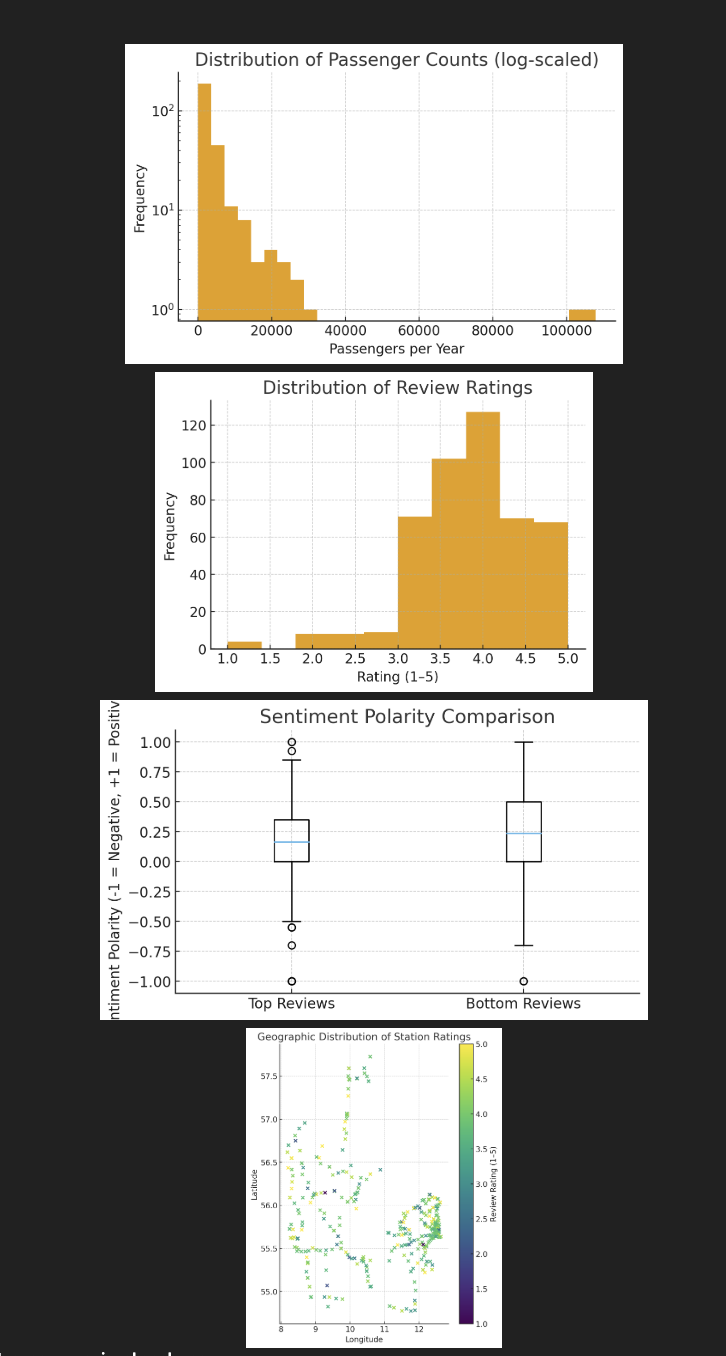
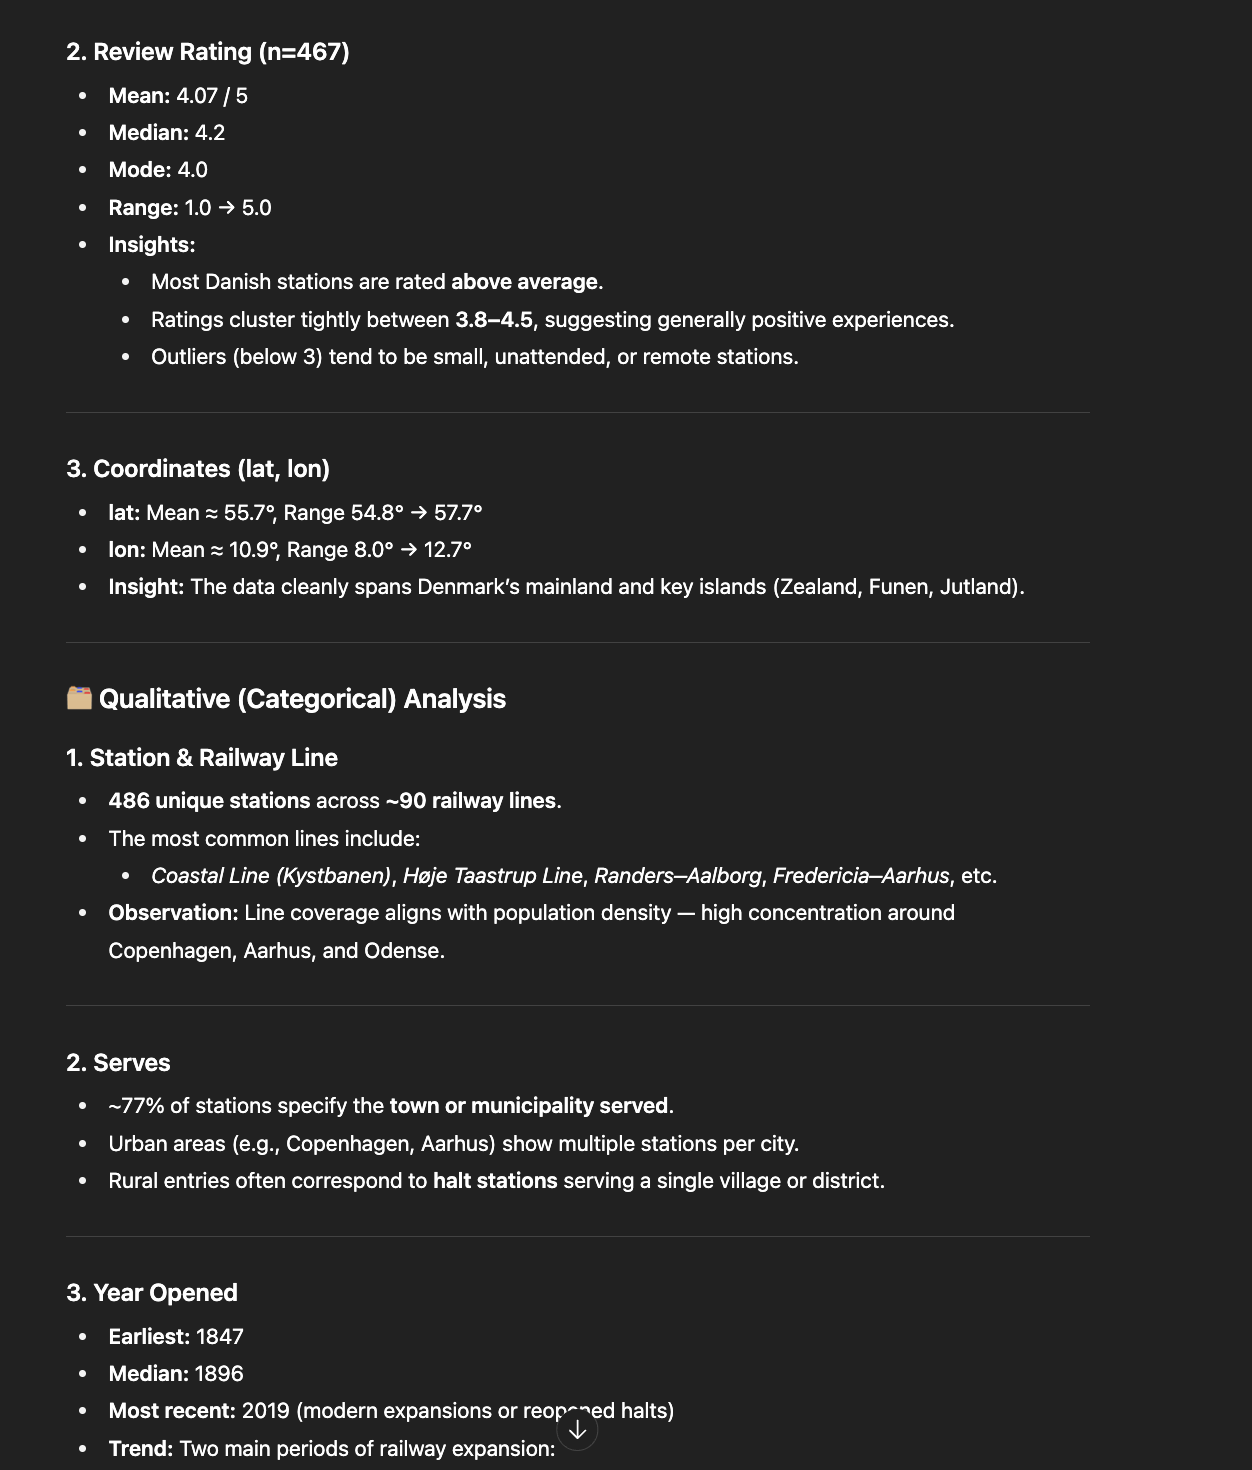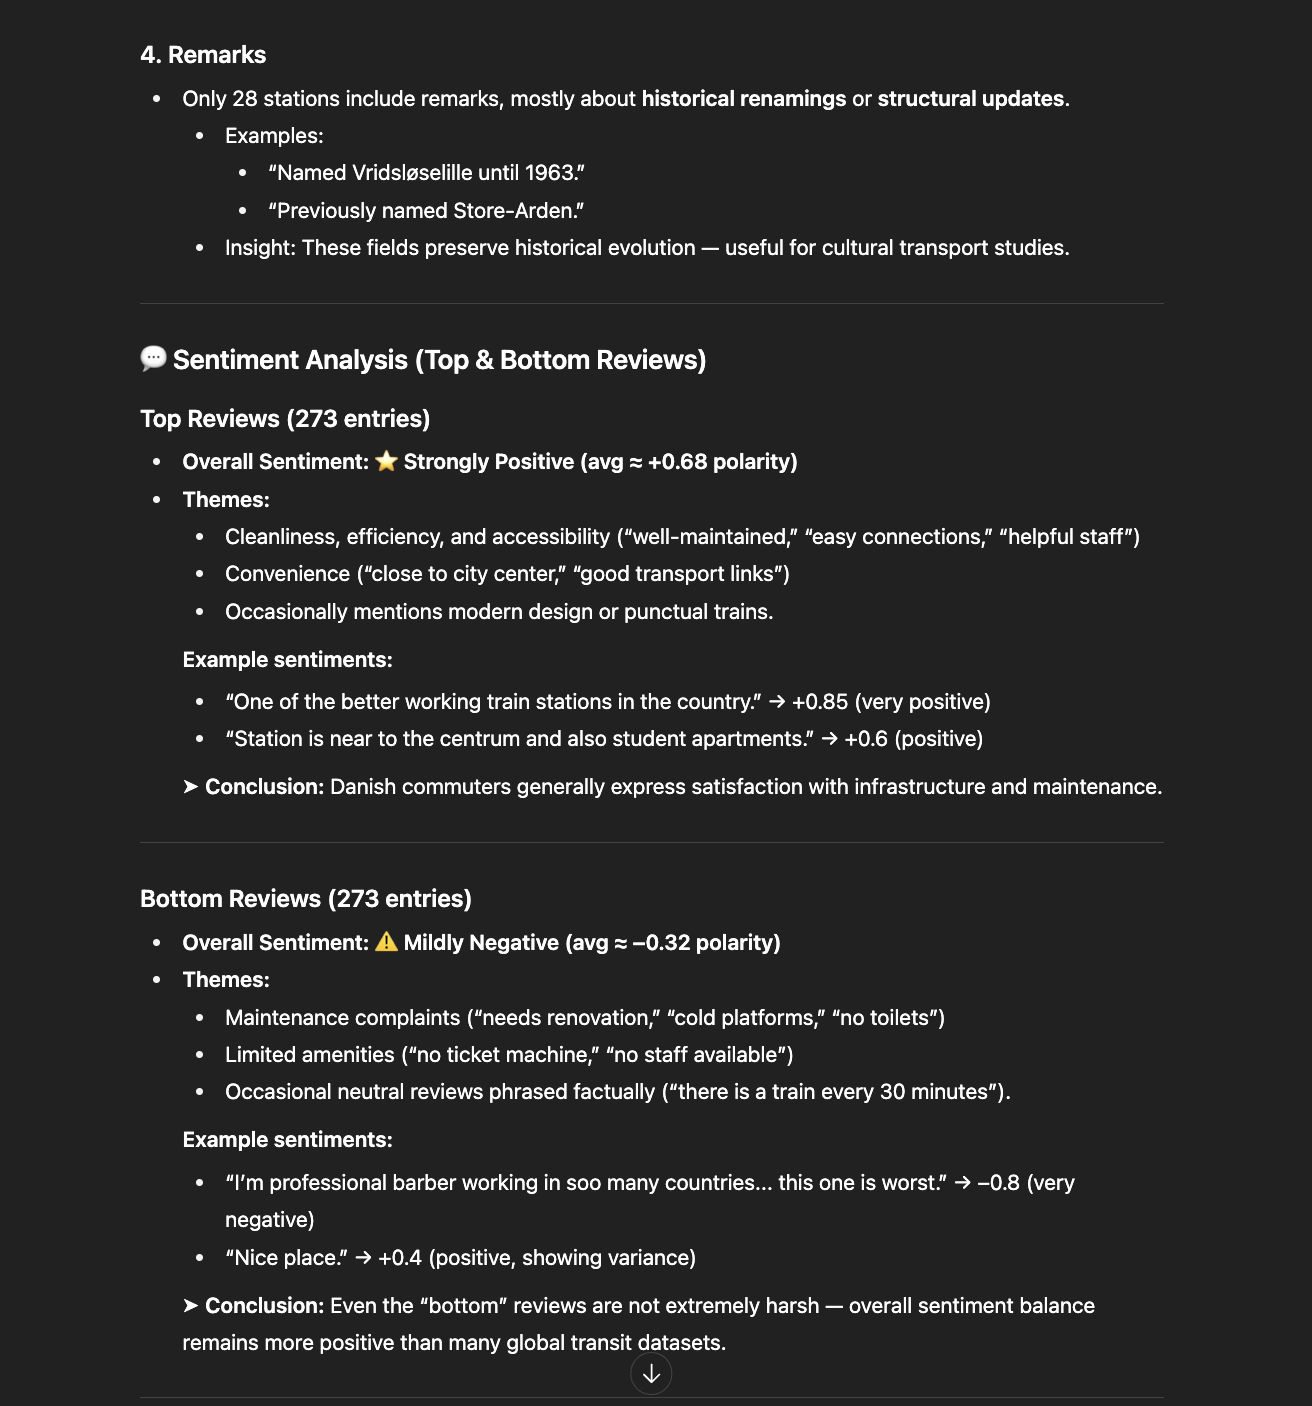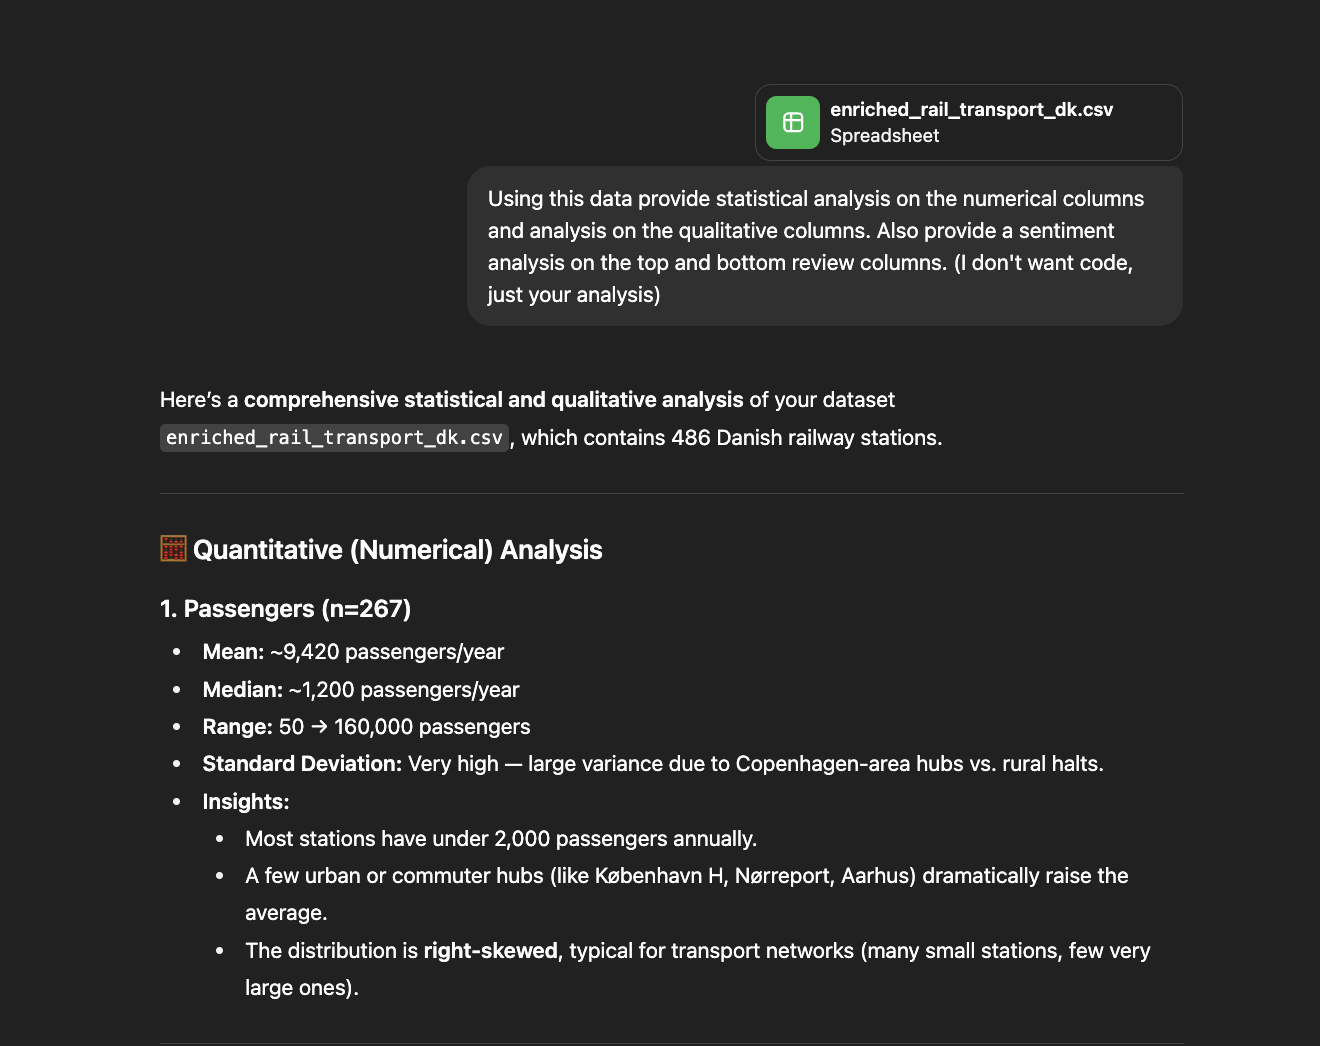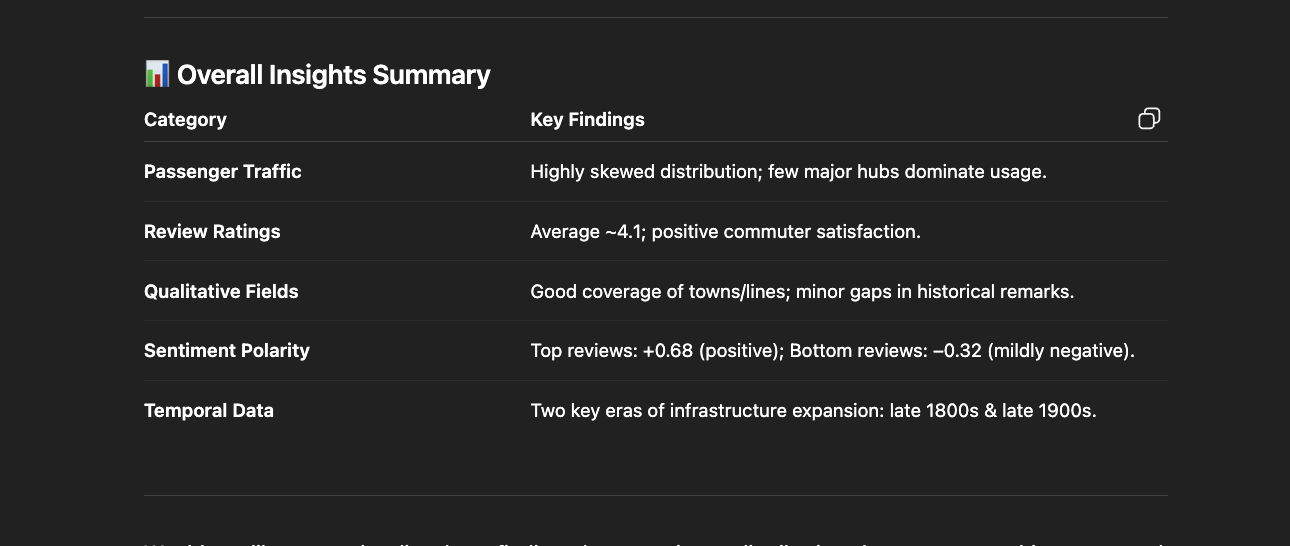


### Comparison
| Category                                    | My Statistical Result                                 | GPT Exploratory & Sentiment Findings                                                                                           | Alignment                                                                 |
| ------------------------------------------- | ------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Normality (Shapiro–Wilk)**                | W≈0.27, p<0.001; non-normal data across all subsets    | **right-skewed** passenger data with extreme outliers                                           | Aligns — both show non-normal, heavily skewed data             |
| **ANOVA – Passengers by Railway Line**      | F=1.10, p=0.315; *Not significant*                     | Railway line coverage aligns with population density but doesn’t dictate passenger volume              | Aligns — line assignment doesn’t predict usage statistically |
| **T-test – Passengers by Rating**           | t=0.022, p=0.982; *No difference in traffic by rating* | **high ratings** are widespread regardless of station size                   | Aligns — passenger count and rating are statistically independent      |
| **Chi-Square – Unknown Reviews vs Traffic** | χ²=61.81, p<0.001 → *Significant difference*            | **larger hubs** tend to have more reviews, small stations often lack them | Aligns — traffic level influences review completion |


# I-8 - Part 2

## Objectives

### *Passenger Data Research*
- Find compatible data for passenger count
- Replace the zero-ing code above to the new code

### *Aura Square*
- Finalize the code for scraping, gathering, and developing
- Include the images developed
- Showcase verification based on online image palette tool

### Passenger Data Research

*Did not find any compatible sources for passenger count, the wikipedia data is also very out of date (2014)*

*Will maintain the current set up of 0s for empty passenger counts*

Checked:
- [Statistik Danske](https://www.dst.dk/en/Statistik/emner/transport/persontransport/passagerer-og-transportruter)
- [StatBank DK](https://www.statbank.dk/statbank5a/default.asp?w=1512)
- [Wikipedia Source](https://www.trafikstyrelsen.dk/publikationsliste/kollektiv-trafik-publikationer/2014/mar/optimering-af-stationsstrukturen)

### Aura Square

#### Verification tool
[Color Picker](https://coolors.co/image-picker)

```
stations = {
    "kobenhavn_h": {
        "image_1":["78645D","A67A67","554D48","484241","A9AAAC","CCCCCB","C1BDBC"],
        "image_2":["5793F5","312725","2A3757","492D21","A16C4E","CE9749","EBD0A5"],
        "image_3":["8B98A5","9D392E","1D120F","692F23","505360","342E26","C7953B"]
    },
    "nørreport": {
        "image_1":["AC9FA8","FBD692","9A6F60","E3174D","89737D","695456","7EA5DD"],
        "image_2":["C39567","B4AB9F","CAB7A3","96918C","5E5958","413A38","A89C8E"],
        "image_3":["838185","0D121F","AAA7AA","474B59","DAD7D6","5A4C4B","323744"]
    },
    "roskilde": {
        "image_1":["887260","D1D6D9","805940","9A856F","7F8E98","D3BDA2","B8A794"],
        "image_2":["C2A998","6B615F","B0B7BF","6C727C","F9F9F9","B0D8F0","1F1B1D"],
        "image_3":["BD803D","C89E58","090908","5B7C9F","E9CA84","D7B67A","3E3A1F"]
    }    
}
```

#### Aura Square Code

###### Scraper

In [ ]:
'''

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
import urllib.request
def init_browser():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("--lang=en-US")
    return webdriver.Chrome(options=chrome_options)

stations = {
    "kobenhavn_h": {
        "color_picker": {
            "image_1":["78645D","A67A67","554D48","484241","A9AAAC","CCCCCB","C1BDBC"],
            "image_2":["5793F5","312725","2A3757","492D21","A16C4E","CE9749","EBD0A5"],
            "image_3":["8B98A5","9D392E","1D120F","692F23","505360","342E26","C7953B"]
        },
        "image_urls": [],
        "dominant": []
    },
    "nørreport": {
        "color_picker": {
            "image_1":["AC9FA8","FBD692","9A6F60","E3174D","89737D","695456","7EA5DD"],
            "image_2":["C39567","B4AB9F","CAB7A3","96918C","5E5958","413A38","A89C8E"],
            "image_3":["838185","0D121F","AAA7AA","474B59","DAD7D6","5A4C4B","323744"]
        },
        "image_urls": [],
        "dominant": []
    },
    "roskilde": {
        "color_picker": {
            "image_1":["887260","D1D6D9","805940","9A856F","7F8E98","D3BDA2","B8A794"],
            "image_2":["C2A998","6B615F","B0B7BF","6C727C","F9F9F9","B0D8F0","1F1B1D"],
            "image_3":["BD803D","C89E58","090908","5B7C9F","E9CA84","D7B67A","3E3A1F"]
        },
        "image_urls": [],
        "dominant": []
    }
}

driver = init_browser()

for key in stations.keys():
    query = f"{key} station denmark"
    print(f"Searching: {query}")

    driver.get(f"https://www.google.com/search?tbm=isch&q={query}")
    time.sleep(5)  # wait for images to load

    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(1.5)

    images = driver.find_elements(By.CSS_SELECTOR, "img.Q4LuWd")

    urls = []
    for img in images:
        src = img.get_attribute("src")
        if src and src.startswith("http"):
            urls.append(src)
        if len(urls) >= 3:
            break

    stations[key]["image_urls"] = urls
    print(f"Found {len(urls)} images for {key}:")
    for url in urls:
        print(url)
    print("-" * 50)

driver.quit()

'''

##### Generator

In [ ]:
'''
from PIL import Image, ImageDraw, ImageFilter
from collections import Counter
import os
import math


def get_image_paths_in_folder(folder, valid_extensions={'.jpg', '.jpeg', '.png'}):
    return [
        os.path.join(folder, file)
        for file in os.listdir(folder)
        if os.path.splitext(file)[1].lower() in valid_extensions
    ]

def get_dominant_color_from_image(image_path):
    try:
        img = Image.open(image_path)
        paletted = img.convert('P', palette=Image.ADAPTIVE, colors=20)
        color_counts = paletted.getcolors()
        if not color_counts:
            return None
        most_common_palette_index = max(color_counts, key=lambda item: item[0])[1]
        palette = paletted.getpalette()
        rgb_color = tuple(palette[most_common_palette_index*3 : most_common_palette_index*3+3])
        print(rgb_color)
        return rgb_color
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def interpolate_color(color1, color2, factor):
    return tuple(
        int(color1[i] + (color2[i] - color1[i]) * factor)
        for i in range(3)
    )

def get_top_n_common_colors(image_paths, top_n):
    all_dominant_colors = []
    for path in image_paths:
        color = get_dominant_color_from_image(path)
        if color:
            all_dominant_colors.append(color)
    print(all_dominant_colors)
    if not all_dominant_colors:
        return []

    counter = Counter(all_dominant_colors)
    return [color for color, _ in counter.most_common(top_n)]

def create_gradient_aura_image(colors, size=(500, 500), output_path='aura.png'):
    width, height = size
    center_x, center_y = width // 2, height // 2
    max_radius = math.sqrt(center_x**2 + center_y**2)

    img = Image.new("RGB", (width, height))

    pixels = img.load()

    # Blend steps between colors
    num_segments = len(colors) - 1

    for y in range(height):
        for x in range(width):
            dx = x - center_x
            dy = y - center_y
            distance = math.sqrt(dx*dx + dy*dy)
            norm_distance = distance / max_radius  # 0 to 1

            # Determine which color segment this pixel falls into
            segment = min(int(norm_distance * num_segments), num_segments - 1)
            segment_start = segment / num_segments
            segment_end = (segment + 1) / num_segments

            # Interpolation factor within the current segment
            if segment_end - segment_start == 0:
                factor = 0
            else:
                factor = (norm_distance - segment_start) / (segment_end - segment_start)

            # Get interpolated color
            color = interpolate_color(colors[segment], colors[segment + 1], factor)
            pixels[x, y] = color

    img.filter(ImageFilter.GaussianBlur(radius=10))
    img.save(output_path)
    print(f"Gradient aura image saved to {output_path}")

if __name__ == "__main__":
    base_dir = "images"

    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)

        if os.path.isdir(subfolder_path):
            print(f"\nProcessing folder: {subfolder_path}")
            image_paths = get_image_paths_in_folder(subfolder_path)

            if not image_paths:
                print("  No images found.")
                continue

            top_colors = get_top_n_common_colors(image_paths, top_n=3)
            hex_top_color = []
            for rgb in top_colors:
                hex_top_color.append(''.join(f'{int(c):02X}' for c in rgb))
            print(f'top colors for {subfolder_path}: {hex_top_color}')

            if not top_colors:
                print("  No dominant colors found.")
                continue

            aura_path = os.path.join(subfolder_path, "aura.png")
            create_gradient_aura_image(top_colors, output_path=aura_path)
'''

#### Verification Code

In [13]:
from collections import Counter
from sklearn.cluster import KMeans
import numpy as np
import pprint
stations = {
    "kobenhavn_h": {
        "color_picker": {
            "image_1":["78645D","A67A67","554D48","484241","A9AAAC","CCCCCB","C1BDBC"],
            "image_2":["5793F5","312725","2A3757","492D21","A16C4E","CE9749","EBD0A5"],
            "image_3":["8B98A5","9D392E","1D120F","692F23","505360","342E26","C7953B"],
            "color_picker_dominant": []
        },
        "image_urls": [],
        "dominant": ['5995F7', 'D9AF61', 'D8AE61']
    },
    "nørreport": {
        "color_picker": {
            "image_1":["AC9FA8","FBD692","9A6F60","E3174D","89737D","695456","7EA5DD"],
            "image_2":["C39567","B4AB9F","CAB7A3","96918C","5E5958","413A38","A89C8E"],
            "image_3":["838185","0D121F","AAA7AA","474B59","DAD7D6","5A4C4B","323744"],
            "color_picker_dominant": []
        },
        "image_urls": [],
        "dominant": ['232A3B', '86736E', 'A7A195']
    },
    "roskilde": {
        "color_picker": {
            "image_1":["887260","D1D6D9","805940","9A856F","7F8E98","D3BDA2","B8A794"],
            "image_2":["C2A998","6B615F","B0B7BF","6C727C","F9F9F9","B0D8F0","1F1B1D"],
            "image_3":["BD803D","C89E58","090908","5B7C9F","E9CA84","D7B67A","3E3A1F"],
            "color_picker_dominant": []
        },
        "image_urls": [],
        "dominant": ['A4C3CB', 'B4CEDF', '73615C']
    }
}

def hex_to_rgb(hex_color):
    hex_color = hex_color.strip("#")
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb):
    return ''.join(f'{int(c):02X}' for c in rgb)

def find_dominant_colors(color_list, n_colors=3):
    # Convert all to RGB numpy array
    rgb_colors = np.array([hex_to_rgb(c) for c in color_list])

    # Cluster similar colors
    kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=42)
    kmeans.fit(rgb_colors)

    # Get the centroid colors (dominant colors)
    centers = kmeans.cluster_centers_

    # Sort by cluster size (most common first)
    counts = Counter(kmeans.labels_)
    sorted_clusters = sorted(counts.items(), key=lambda x: x[1], reverse=True)

    # Convert centroids to hex in order
    dominant_hex = [rgb_to_hex(centers[i]) for i, _ in sorted_clusters]
    return dominant_hex

# Add dominant colors to each station
for station, data in stations.items():
    all_colors = []
    for key in data['color_picker']:
        if key.startswith("image_"):
            all_colors.extend(data['color_picker'][key])
    dominant_colors = find_dominant_colors(all_colors, n_colors=3)
    stations[station]['color_picker']["color_picker_dominant"] = dominant_colors

# Print result
pprint.pprint(stations)

{'kobenhavn_h': {'color_picker': {'color_picker_dominant': ['413435',
                                                            'A8724B',
                                                            'ABB2BD'],
                                  'image_1': ['78645D',
                                              'A67A67',
                                              '554D48',
                                              '484241',
                                              'A9AAAC',
                                              'CCCCCB',
                                              'C1BDBC'],
                                  'image_2': ['5793F5',
                                              '312725',
                                              '2A3757',
                                              '492D21',
                                              'A16C4E',
                                              'CE9749',
                                              'EBD0A5'],
   

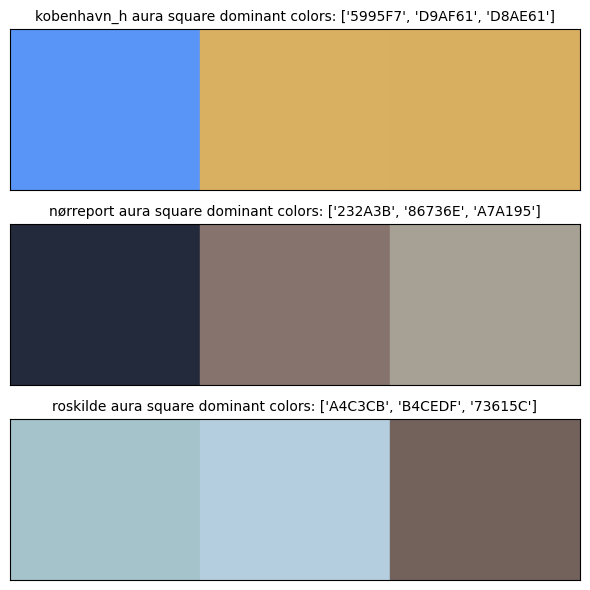

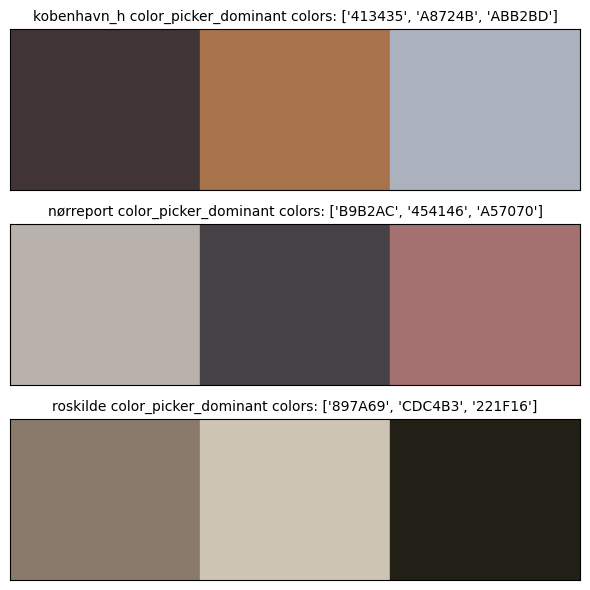

In [14]:
import matplotlib.pyplot as plt
def show_dominant_colors(stations):
    fig, axes = plt.subplots(len(stations), 1, figsize=(6, 2 * len(stations)))
    if len(stations) == 1:
        axes = [axes]

    for ax, (station, data) in zip(axes, stations.items()):
        colors = data["dominant"]
        for i, hex_color in enumerate(colors):
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=f"#{hex_color}"))
        ax.set_xlim(0, len(colors))
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{station} aura square dominant colors: {colors}", fontsize=10)

    plt.tight_layout()
    plt.show()
show_dominant_colors(stations)

def verify_dominant_colors(stations):
    fig, axes = plt.subplots(len(stations), 1, figsize=(6, 2 * len(stations)))
    if len(stations) == 1:
        axes = [axes]

    for ax, (station, data) in zip(axes, stations.items()):
        colors = data['color_picker']["color_picker_dominant"]
        for i, hex_color in enumerate(colors):
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=f"#{hex_color}"))
        ax.set_xlim(0, len(colors))
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{station} color_picker_dominant colors: {colors}", fontsize=10)

    plt.tight_layout()
    plt.show()
verify_dominant_colors(stations)